<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-2.-Разведочный-анализ-данных" data-toc-modified-id="Задание-2.-Разведочный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 2. Разведочный анализ данных</a></span></li><li><span><a href="#Задание-3.-Построение-модели" data-toc-modified-id="Задание-3.-Построение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 3. Построение модели</a></span></li></ul></div>

# Shift + Enter (Alfa Digital)

**Цель работы:** построение модели кредитного скоринга.

**Задачи:**<br>
1.Разведочный анализ данных <br>
2. построение модели для скоринга

## Задание 2. Разведочный анализ данных

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import graphviz
from sklearn import tree
import pydotplus

In [4]:
data = pd.read_excel('C:/Users/Админ/Desktop/стажировка_shift+enter/лето_2022/alfa/risk.xlsx')

In [5]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


По описанию к данным:<br>
X1: Сумма предоставленного кредита (NT доллар): включает как индивидуальный потребительский кредит, так и его/ее семейный (дополнительный) кредит.<br>
X2: Пол (1 = мужской; 2 = женский).<br>
X3: Образование (1 = аспирантура, 2 = университет, 3 = средняя школа, 4 = другое).<br>
X4: Семейное положение (1 = женат, 2 = холост, 3 = другие).<br>
X5: Возраст (год).<br>
X6 - X11: История прошлых платежей. Были отслежены записи прошлых ежемесячных платежей (с апреля по сентябрь 2005 г.) следующим образом: X6 = статус погашения в сентябре 2005 г.; X7 = статус погашения в августе 2005 г.; . . .;X11 = статус погашения в апреле 2005 г. <br>
Шкала измерения для статуса погашения: -1 = платить должным образом; 1 = отсрочка платежа на один месяц; 2 = отсрочка платежа на два месяца; . . .; 8 = отсрочка<br> 
X12-X17: Сумма выписки по счету (NT доллар). X12 = сумма выписки по векселю в сентябре 2005 г.; X13 = сумма выписки по векселю за август 2005 г.; . . .; X17 = сумма выписки по векселю в апреле 2005 года.<br>
X18-X23: Сумма предыдущего платежа (NT доллар). X18 = сумма, выплаченная в сентябре 2005 г.; X19 = сумма, выплаченная в августе 2005 г.; . . .;X23 = сумма, выплаченная в апреле 2005 г.<br>
Y — вероятность дефолта заемщика в след.месяце (0 — нет, 1 — да)

In [6]:
data.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

Пропусков в датасете не обнаружено.

In [7]:
data.duplicated().sum()

0

Дубликатов в датасете нет.

In [8]:
data = data.drop(labels = [0],axis = 0)

Изучим распределение целевой переменной.

0    78.0
1    22.0
Name: Y, dtype: float64 



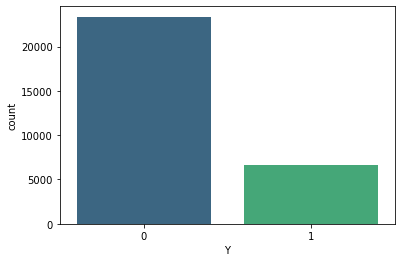

In [9]:
print(round(data['Y'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='Y', data=data, palette="viridis");

По полученному графику распределения целевой переменной можно увидеть, что значения распределны неравномерно - значение 0 встречается значительно чаще. 78% значений целевой переменной равны 0, 22% - 1.
Среди заемщиков больше тех, у кого вероятность дефолта в следующем месяце равна нулю.

Построим распределение заемщиков по возрасту.

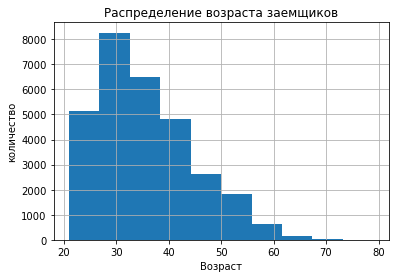

In [10]:
data.X5.hist(bins = 10).set(title = "Распределение возраста заемщиков", xlabel = 'Возраст', 
                            ylabel = 'количество');

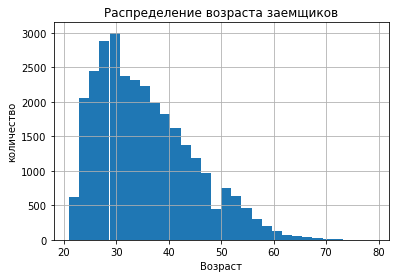

In [11]:
data.X5.hist(bins = 30).set(title = "Распределение возраста заемщиков", xlabel = 'Возраст', 
                            ylabel = 'количество');

In [12]:
data.X5.mean()

35.4855

По графикам можно увидеть, что возраст заемщиков находится в диапазоне от 20 до 70 лет. Наибольшее количество сосредоточено в возрасте около 30 лет, после чего значения плавно снижаются. Средний возраст заемщика составляет около 35,5 лет.

Построим распределение по полу.

2    60.0
1    40.0
Name: X2, dtype: float64 



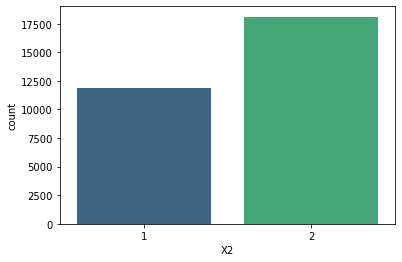

In [13]:
print(round(data['X2'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='X2', data=data, palette="viridis");

По полученному распределению получаем, что заемщики женского пола встречаются чаще, чем мужского. Далее изучим распределение возрастов для мужчин и женщин.

In [14]:
data_man = data.query('X2 == 1')

In [15]:
data_woman = data.query('X2 == 2')

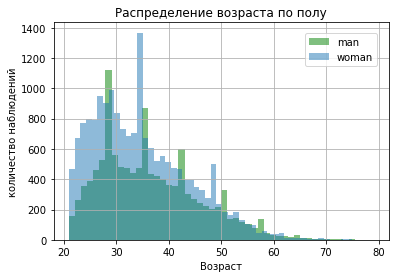

In [16]:
ax1 = plt.hist(x = data_man.X5, bins = 50, alpha = 0.5, label = 'man', color = 'green')
plt.legend(bbox_to_anchor=(0.75, 0.85), loc=2, borderaxespad=0.)
plt.hist(x = data_woman.X5, bins = 50, alpha = 0.5, label = 'woman')
plt.legend(bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)
plt.title('Распределение возраста по полу')
plt.xlabel('Возраст')
plt.ylabel('количество наблюдений')
plt.grid(visible = True)

Среди заемщиков женского пола значительно больше в возрасте от 20 до 40 лет по сравнению с заемшиками мужского пола. 

Перейдем к следующему параметру - образование.

2    47.0
1    35.0
3    16.0
5     1.0
4     0.0
6     0.0
0     0.0
Name: X3, dtype: float64 



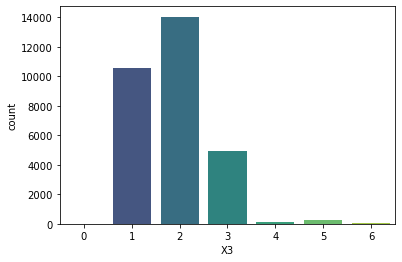

In [17]:
print(round(data['X3'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='X3', data=data, palette="viridis");

Чаще встего встречаются заемщики с униварситетом (2), реже - с аспирантурой(1) и средней школой(3), другие случаи более редки. Получаем, что люди с высшим образованием берут кредиты чаще.

2    53.0
1    46.0
3     1.0
0     0.0
Name: X4, dtype: float64 



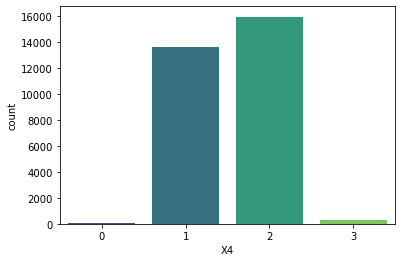

In [18]:
print(round(data['X4'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='X4', data=data, palette="viridis");

Чаще встречаются холостые заемщики, реже - холостые. Другие значения встречаются значительно реже.

## Задание 3. Построение модели

Для построения модели разделим исходный датасет на обучающую и тестовую выборку.

In [19]:
target = data.Y 

In [36]:
target = target.astype('int')

In [37]:
features = data.drop('Y', axis = 1)

In [38]:
features = features.astype('int')

In [39]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [40]:
print(features_train.shape, target_train.shape)

(24000, 24) (24000,)


In [41]:
print(features_test.shape, target_test.shape)

(6000, 24) (6000,)


Перейдем к построению модели.

In [31]:
clf = DecisionTreeClassifier(random_state=0)

In [44]:
clf.fit(features_train, target_train)

DecisionTreeClassifier(random_state=0)

In [45]:
result_train = clf.predict(features_train)
result_test = clf.predict(features_test)

In [48]:
roc_auc_train = roc_auc_score(target_train, result_train)
roc_auc_test = roc_auc_score(target_test, result_test)

In [49]:
print('ROC AUC на обучающей выборке', roc_auc_train)
print('ROC AUC на тестовой выборке', roc_auc_test)

ROC AUC на обучающей выборке 1.0
ROC AUC на тестовой выборке 0.6044915925837878


In [74]:
print(clf.tree_.max_depth)

42


Получаем, что результат на тестовой выборке значительно ниже, чем на предыдущей, при этом глубина полученого дерева равна 42. Построенное дерево переобучено. Для того, чтобы добиться более высокого результата уменьшим его глубину.

In [87]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 8)
clf.fit(features_train, target_train)
result_train = clf.predict(features_train)
result_test = clf.predict(features_test)
roc_auc_train = roc_auc_score(target_train, result_train)
roc_auc_test = roc_auc_score(target_test, result_test)
print('ROC AUC на обучающей выборке', roc_auc_train)
print('ROC AUC на тестовой выборке', roc_auc_test)

ROC AUC на обучающей выборке 0.681459963993725
ROC AUC на тестовой выборке 0.6519750225502601


In [98]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

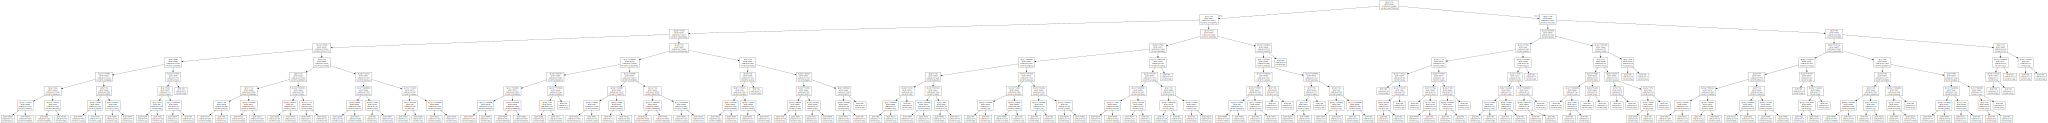

In [99]:
graph

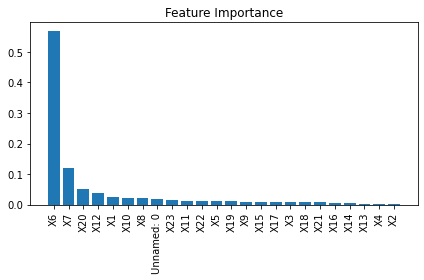

In [106]:
importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(features_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(features_train.shape[1]), features_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Наиболее важный параметр - история прошлых платежей (Х6, Х7), сумма предыдущего платежа (Х20), сумма выписки по счету (Х12), сумма предоставленного кредита (Х1).
Большое влияние имеет история прошлых платежей, поскольку это может говорить о поведенческих привычках человека, его возрасте и опыте работы.